# Multiple Series

TimeGPT provides a robust solution for multi-series forecasting, which involves analyzing multiple data series concurrently, rather than a single one. The tool can be fine-tuned using a broad collection of series, enabling you to tailor the model to suit your specific needs or tasks.

In [ ]:
#| hide
from nixtlats.utils import colab_badge

In [ ]:
#| echo: false
colab_badge('docs/tutorials/6_multiple_series')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/tutorials/6_multiple_series.ipynb)

In [ ]:
#| hide
from dotenv import load_dotenv

In [ ]:
#| hide
load_dotenv()

True

In [ ]:
import pandas as pd
from nixtlats import TimeGPT

/home/ubuntu/miniconda/envs/nixtlats/lib/python3.11/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [ ]:
timegpt = TimeGPT(
    # defaults to os.environ.get("TIMEGPT_TOKEN")
    token = 'my_token_provided_by_nixtla'
)

In [ ]:
#| hide
timegpt = TimeGPT()

The following dataset contains prices of different electricity markets. Let see how can we forecast them. The main argument of the forecast method is the input data frame with the historical values of the time series you want to forecast. This data frame can contain information from many time series. Use the `unique_id` column to identify the different time series of your dataset.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')
df.head()

,unique_id,ds,y
0,BE,2016-12-01 00:00:00,72.00
1,BE,2016-12-01 01:00:00,65.80
2,BE,2016-12-01 02:00:00,59.99
3,BE,2016-12-01 03:00:00,50.69
4,BE,2016-12-01 04:00:00,52.58


Let's plot this series using [`StatsForecast`](https://github.com/Nixtla/statsforecast):

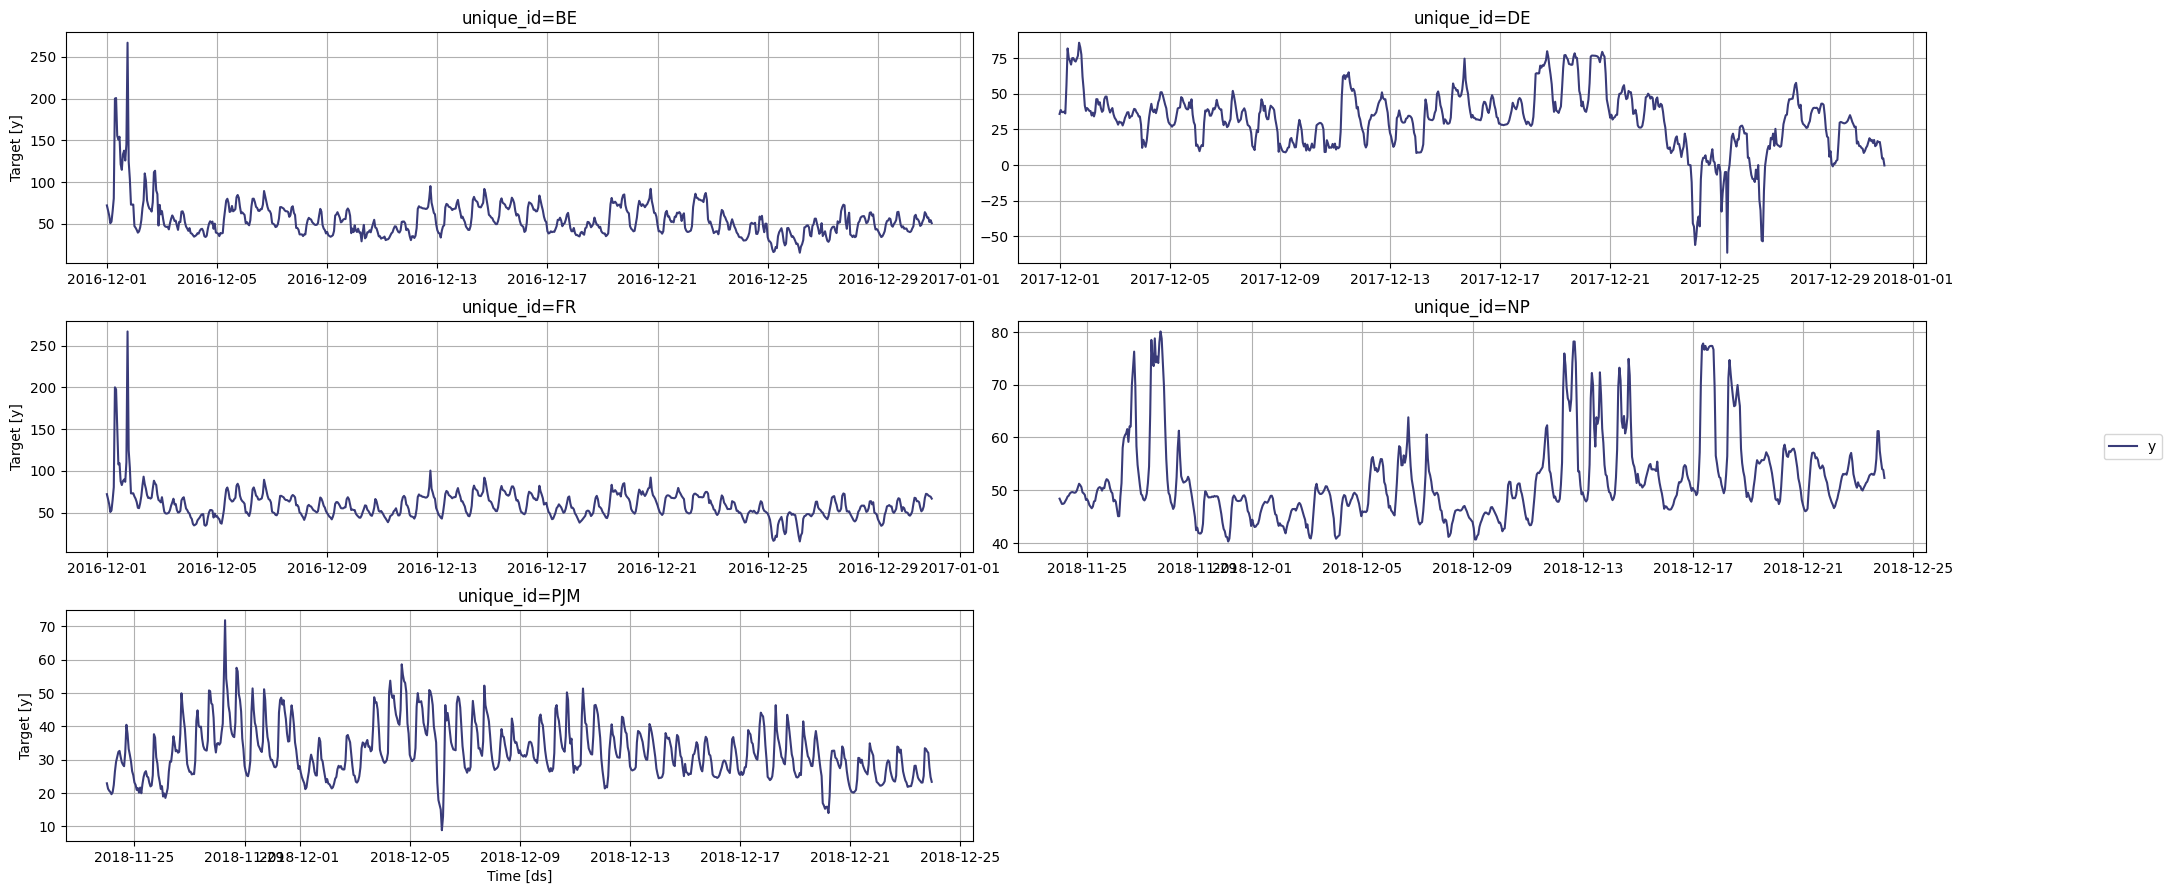

In [ ]:
timegpt.plot(df)

We just have to pass the dataframe to create forecasts for all the time series at once. 

In [ ]:
timegpt_fcst_multiseries_df = timegpt.forecast(df=df, h=24, level=[80, 90])
timegpt_fcst_multiseries_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: H
INFO:nixtlats.timegpt:Restricting input...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,unique_id,ds,TimeGPT,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-hi-80,TimeGPT-hi-90
0,BE,2016-12-31 00:00:00,46.151176,36.660475,38.337019,53.965334,55.641878
1,BE,2016-12-31 01:00:00,42.426598,31.602227,33.976717,50.876478,53.250968
2,BE,2016-12-31 02:00:00,40.242889,30.439966,33.634981,46.850798,50.045813
3,BE,2016-12-31 03:00:00,38.265339,26.841481,31.022096,45.508582,49.689197
4,BE,2016-12-31 04:00:00,36.618801,18.541384,27.981348,45.256255,54.696218


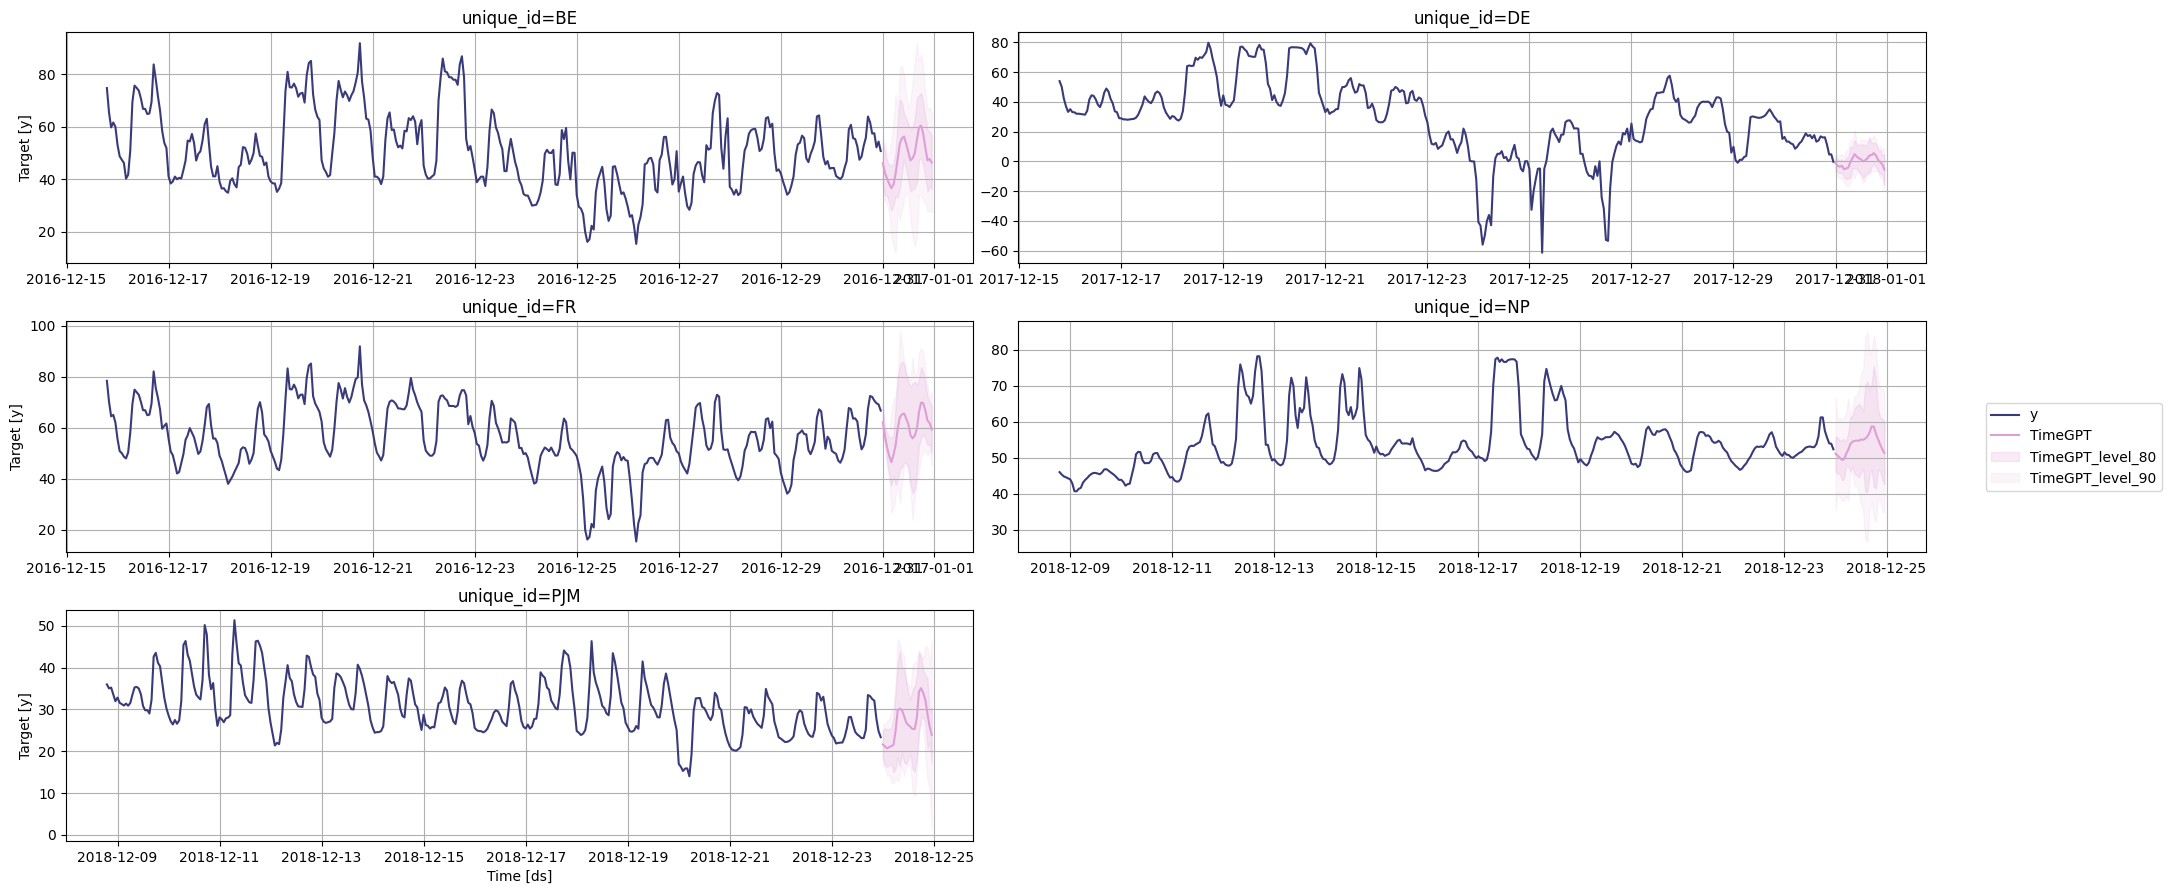

In [ ]:
timegpt.plot(df, timegpt_fcst_multiseries_df, max_insample_length=365, level=[80, 90])

#### Historical forecast

You can also compute prediction intervals for historical forecasts adding the `add_history=True` parameter as follows:

In [ ]:
timegpt_fcst_multiseries_with_history_df = timegpt.forecast(df=df, h=24, level=[80, 90], add_history=True)
timegpt_fcst_multiseries_with_history_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: H
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...


,unique_id,ds,TimeGPT,TimeGPT-lo-80,TimeGPT-lo-90,TimeGPT-hi-80,TimeGPT-hi-90
0,BE,2016-12-06 00:00:00,55.756325,42.066469,38.185585,69.446180,73.327064
1,BE,2016-12-06 01:00:00,52.820198,39.130342,35.249458,66.510054,70.390938
2,BE,2016-12-06 02:00:00,46.851078,33.161222,29.280338,60.540934,64.421818
3,BE,2016-12-06 03:00:00,50.640884,36.951029,33.070145,64.330740,68.211624
4,BE,2016-12-06 04:00:00,52.420395,38.730539,34.849655,66.110251,69.991134


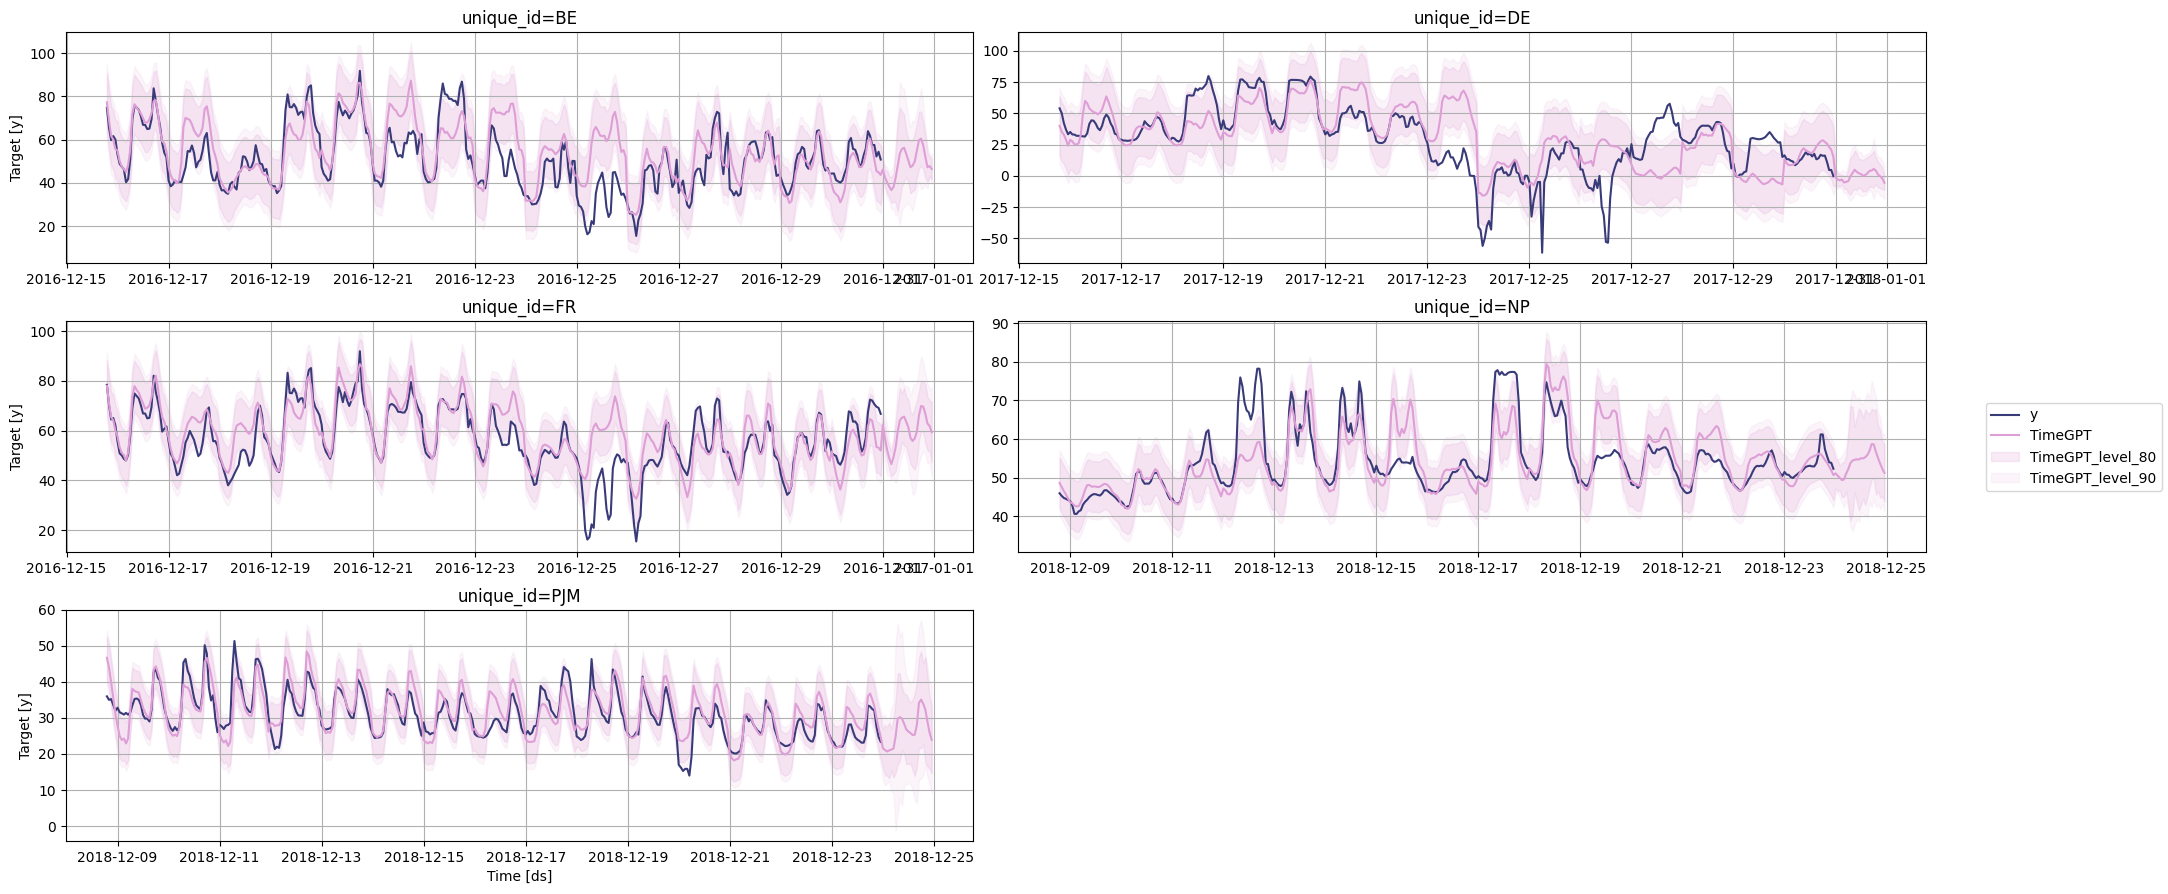

In [ ]:
timegpt.plot(
    df, 
    timegpt_fcst_multiseries_with_history_df.groupby('unique_id').tail(365 + 24), 
    max_insample_length=365, 
    level=[80, 90],
)